### why do we do statistical inference? 
 
- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data
- To draw more general conclusions from relatively few data or observations.

통계적 추론에는 데이터를 확률론적 결론으로 가져가는 것이 포함되며, 이러한 결론에 기초하여 의사결정을 내릴 수 있다.


### Why do we use the language of probability?

- Probability provides a measure of uncertainty
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to very

### Generating random numbers using the np.random module


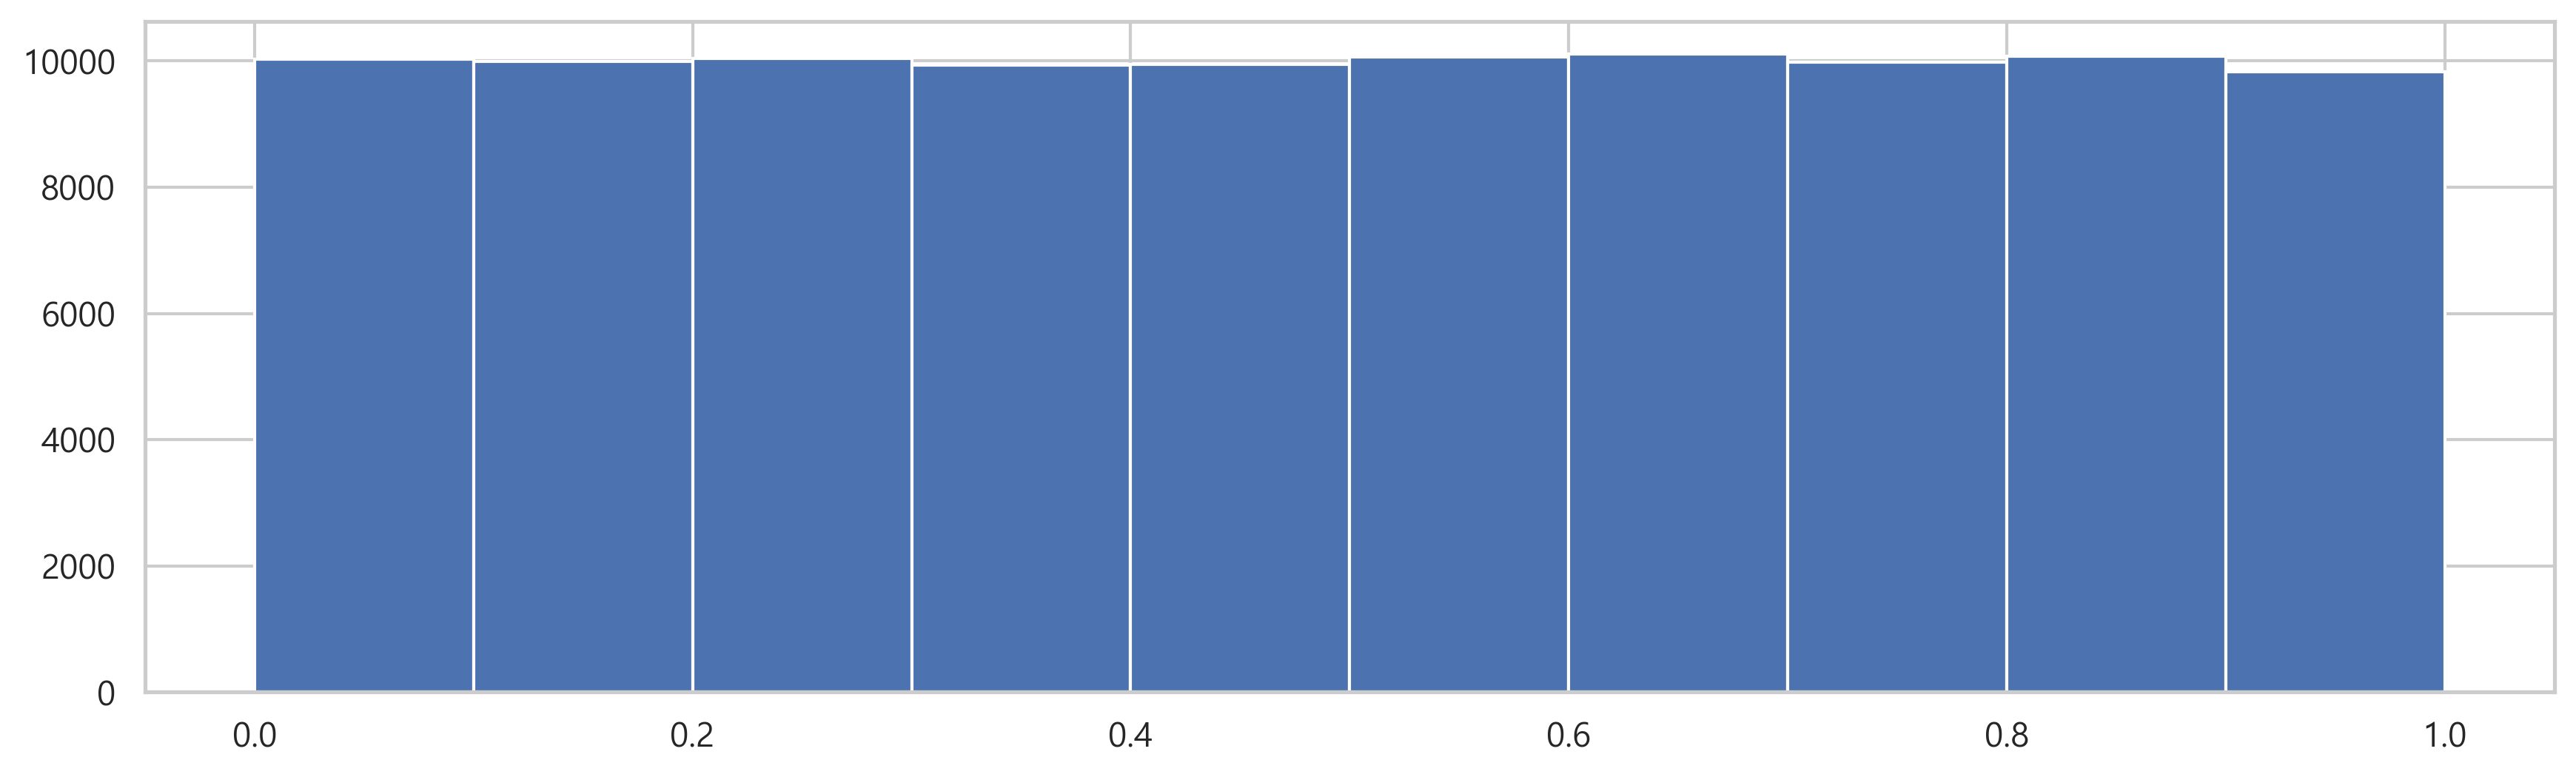

In [6]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### The np.random module and Bernoulli trials
베르누이 시행 (Bernoulli trial 또는 binomial trial)은 확률론과 통계학에서 임의의 결과가 '성공' 또는 '실패'의 두 가지 중 하나인 실험을 뜻한다. (wikipedia)


In [7]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p :
            n_success += 1

    return n_success

100개의 담보 대출중 채무 불이행이 발생할 수의 확률을 베르누이로 푼 예제 (채무불이행할 확률 0.05)

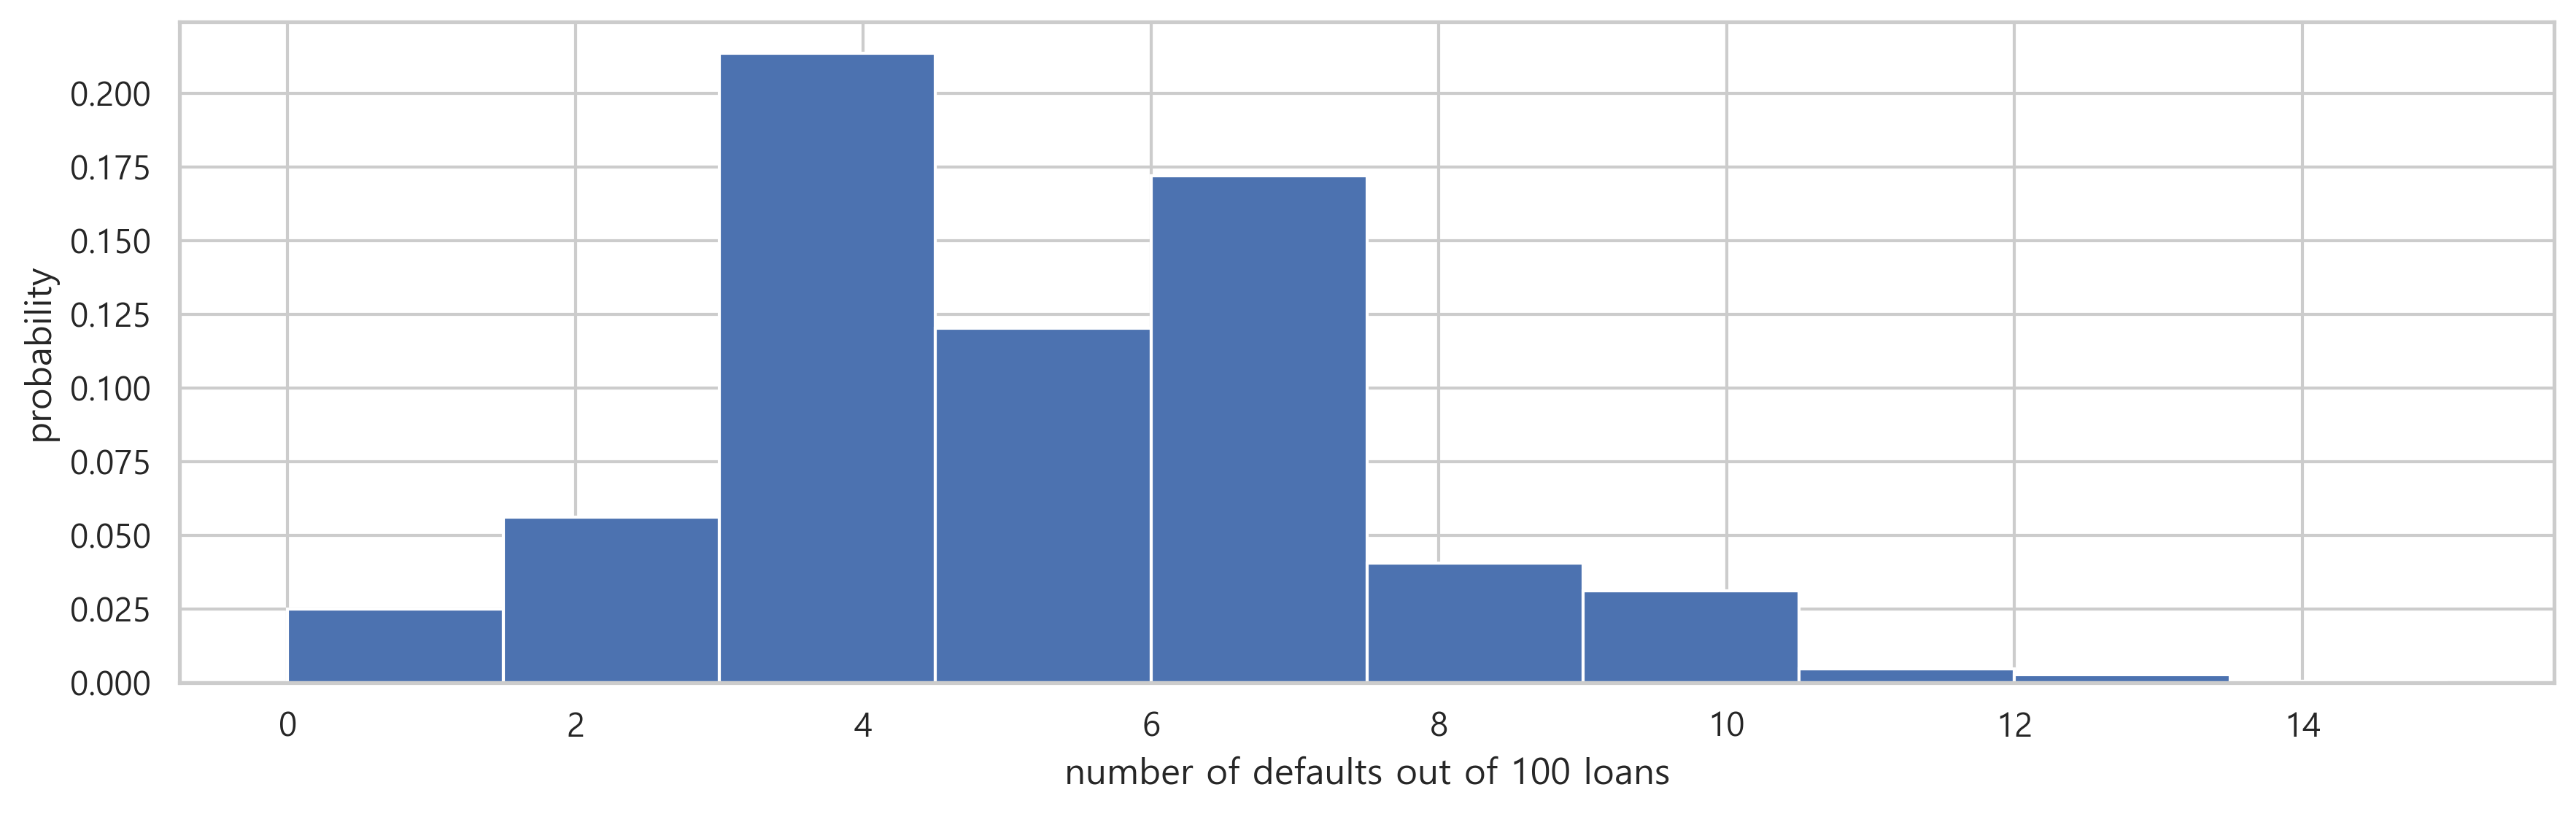

In [8]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(10000)

# Compute the number of defaults
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [9]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


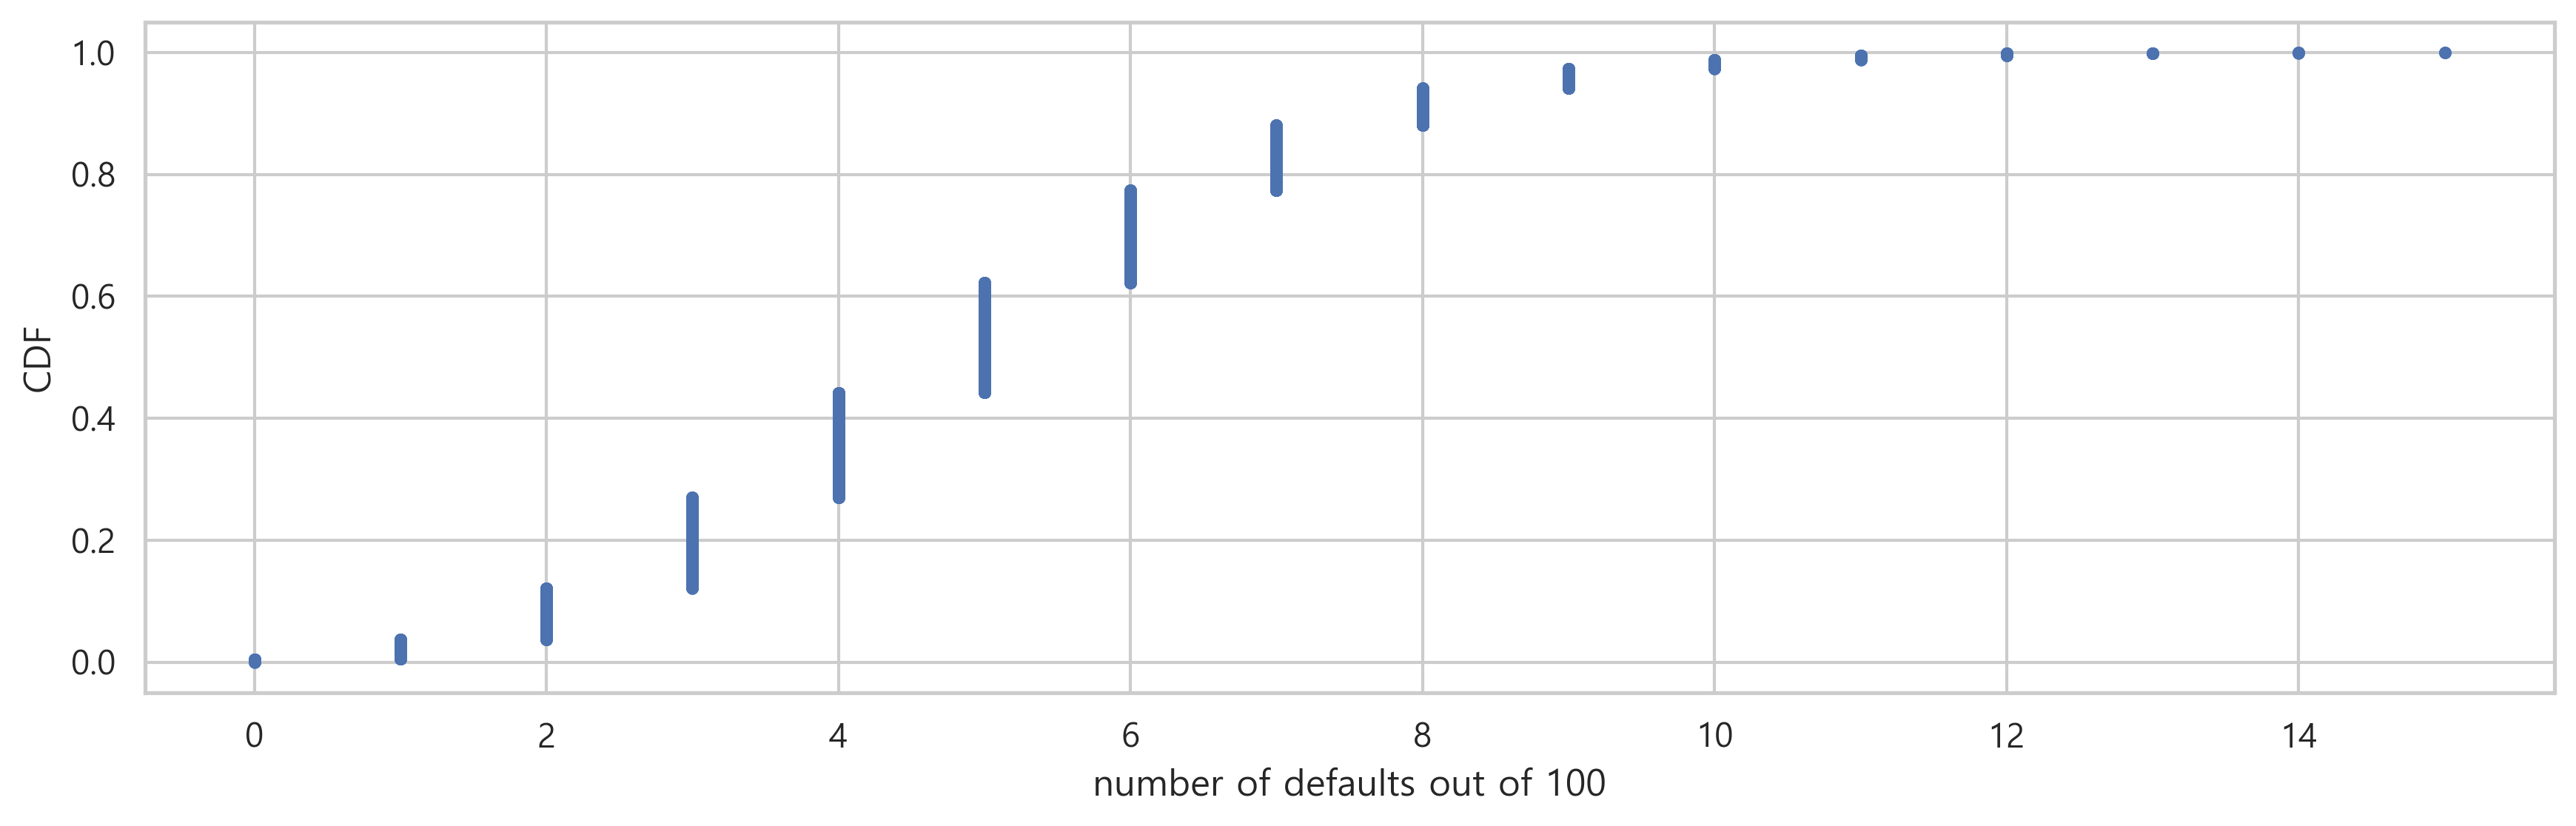

Probability of losing money = 0.0263


In [10]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker ='.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')
# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)
n_lose_money
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))



### Sampling out of the Binomial distribution

PMF : Probability mass function
: the set of probabilities of discrete outcomes (불연속 결과의 확률 집합)

Binomial distribution (이항분포)
- The number r of successes in n Bernoulli trials with probability p 
- 이항 분포(二項分布)는 연속된 n번의 독립적 시행에서 각 시행이 확률 p를 가질 때의 이산 확률 분포이다. 이러한 시행은 베르누이 시행이라고 불리기도 한다. 사실, n=1일 때 이항 분포는 베르누이 분포이다.




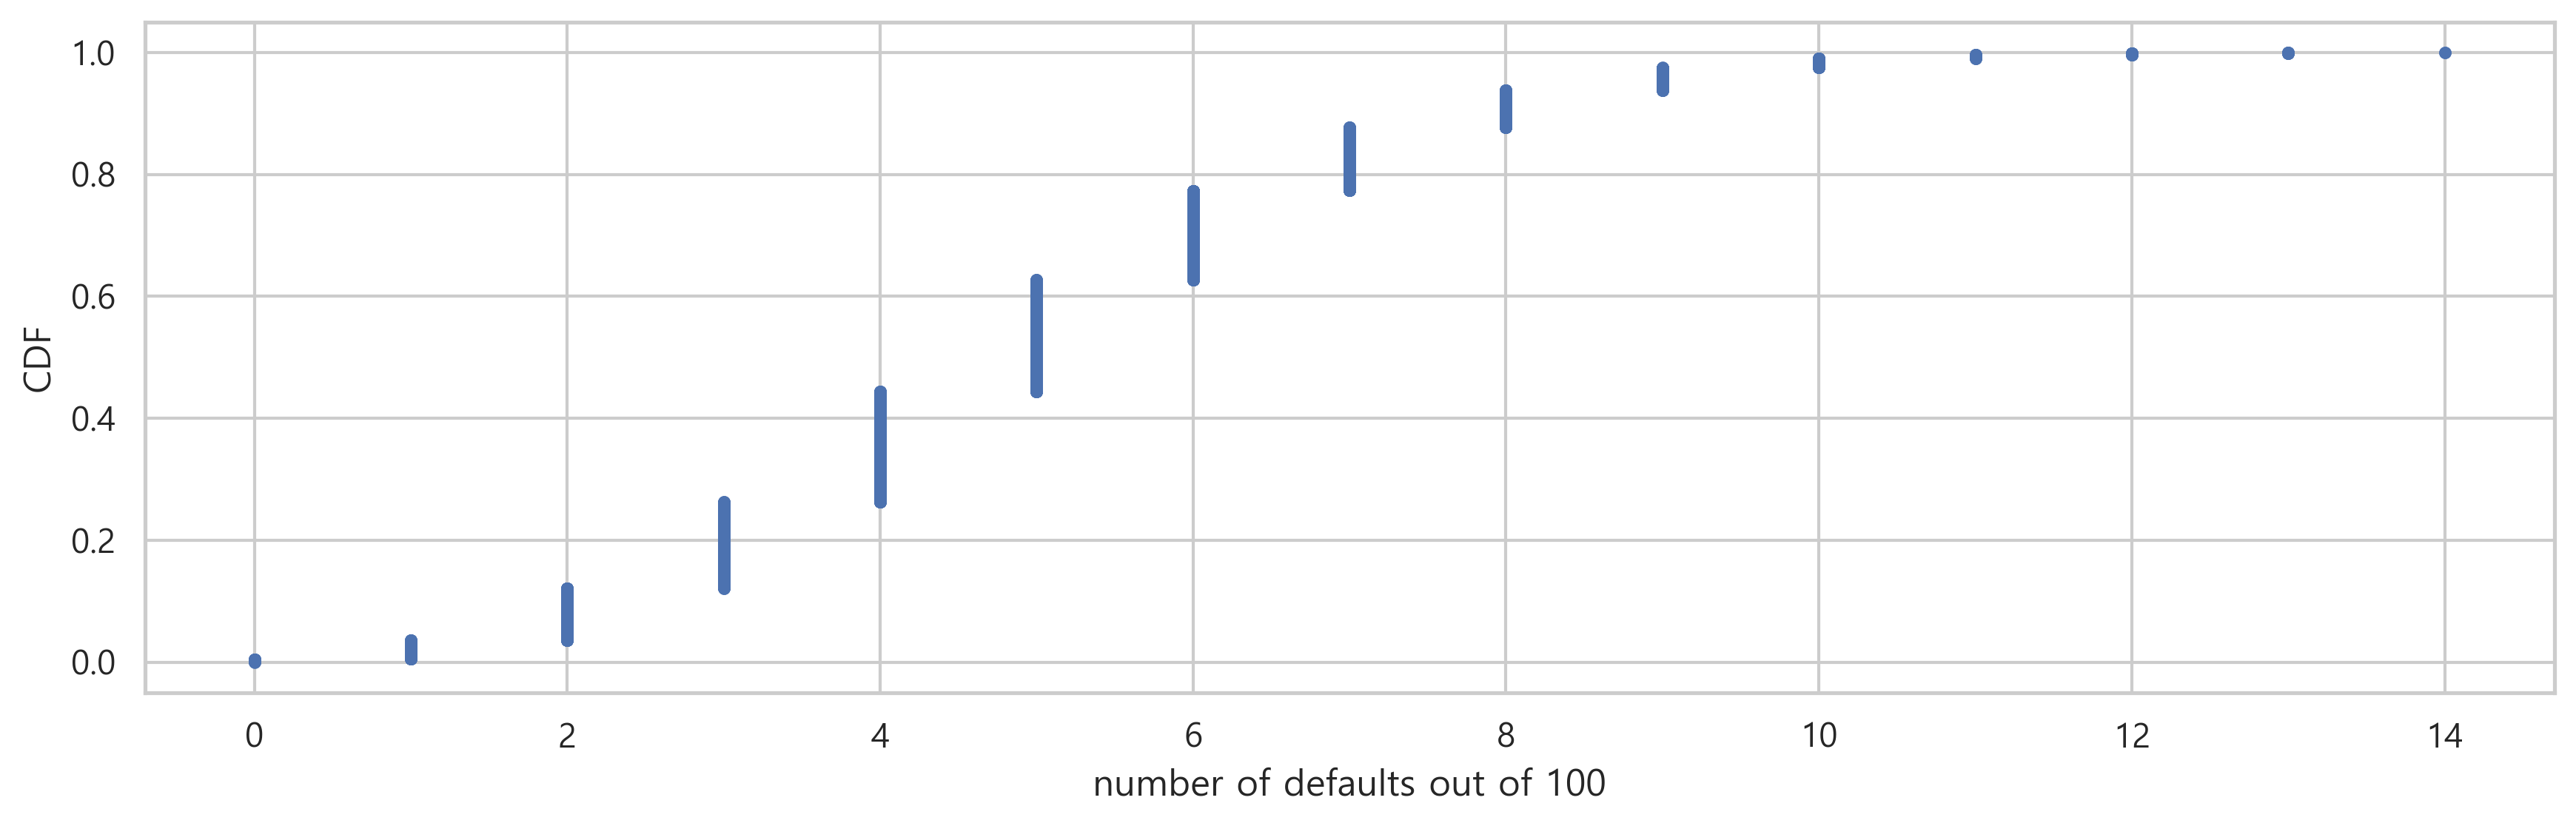

In [11]:
# Take 10,000 samples out of the binomial distribution: n_defaults
np.random.seed(42)
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker ='.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()


### Plotting the Binomial PMF


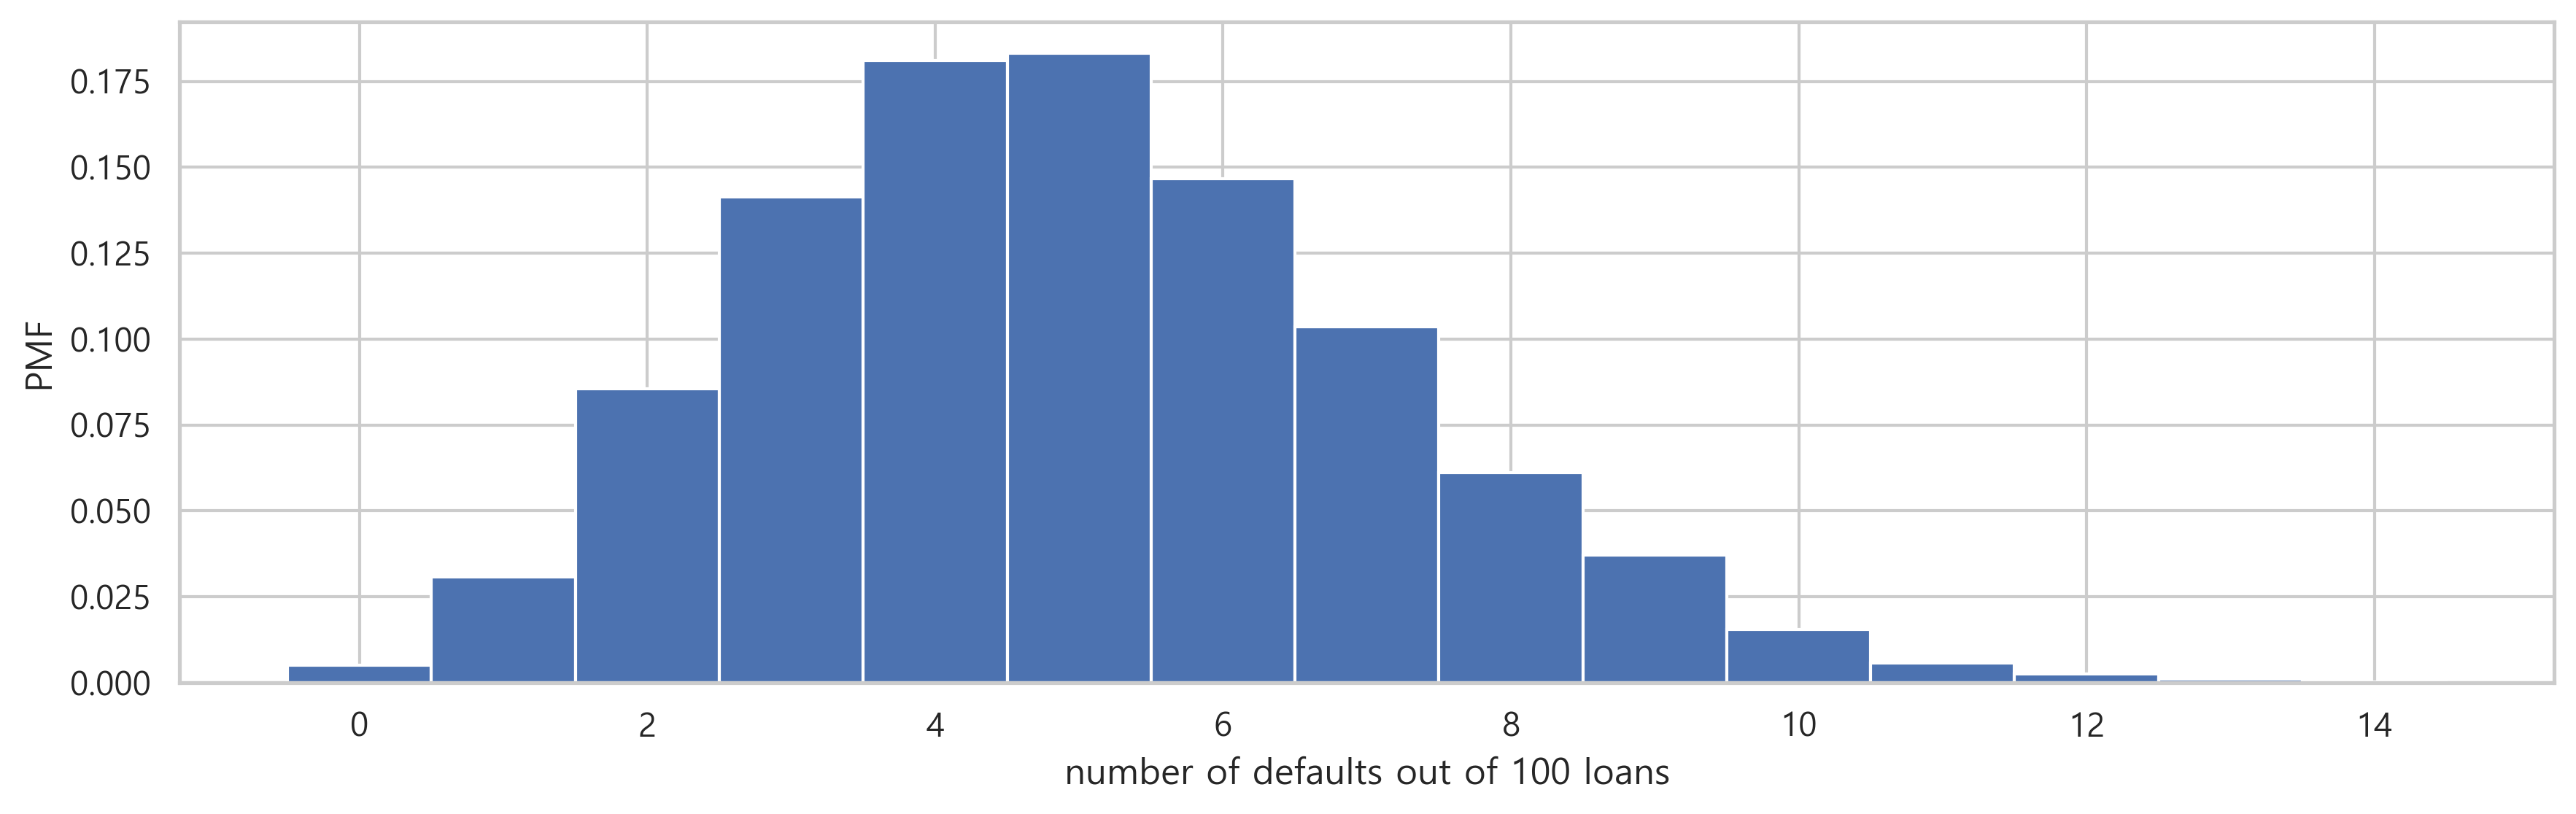

In [20]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

Poisson process
- the timing of the next event is completely independent of when the previous event happened
- 푸아송 분포(Poisson分布, 영어: Poisson distribution)는 확률론에서 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다.

poisson distribution
- The number r of arrival of a Poisson process in a given time interval with average rate of? arrivals per interval is Poisson distributed.

- The number r of hits on a website in one hour with an hit rate of 6 hits per hour is poisson distributed

### Relationship between Binomial and Poisson distributions

- Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.


In [21]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.